In [1]:
import numpy
in_1=numpy.load(r'C:\Users\e-wel\Documents\Python Scripts\40天原始记录\起始_新华_11.npy',allow_pickle=True).item()
# in_2=numpy.load(r'C:\Users\e-wel\Desktop\xinhua_11\xinhua_11_all\input_1.npy')
# in_1[0][:5]==in_2[0][:5]


In [6]:
section_info=numpy.load(r'C:\Users\e-wel\Documents\Python Scripts\40天统计信息及路段情况\section_ID_info.npy',allow_pickle=True).item()
path_printed=''
for seg in in_1.keys():
    path_printed+=section_info[str(seg)][0]
path_printed

'胜利西路（延安路-新华北路）胜利东路（新华北路-元光南路）元光北路（胜利东路-漳福路）元光北路（漳福路-腾飞路）漳华东路（元光路-丹霞路）丹霞路（漳华路-腾飞路）丹霞路（腾飞路-胜利东路）丹霞路（胜利东路-南昌路）'

In [9]:
import matplotlib.pyplot as plt

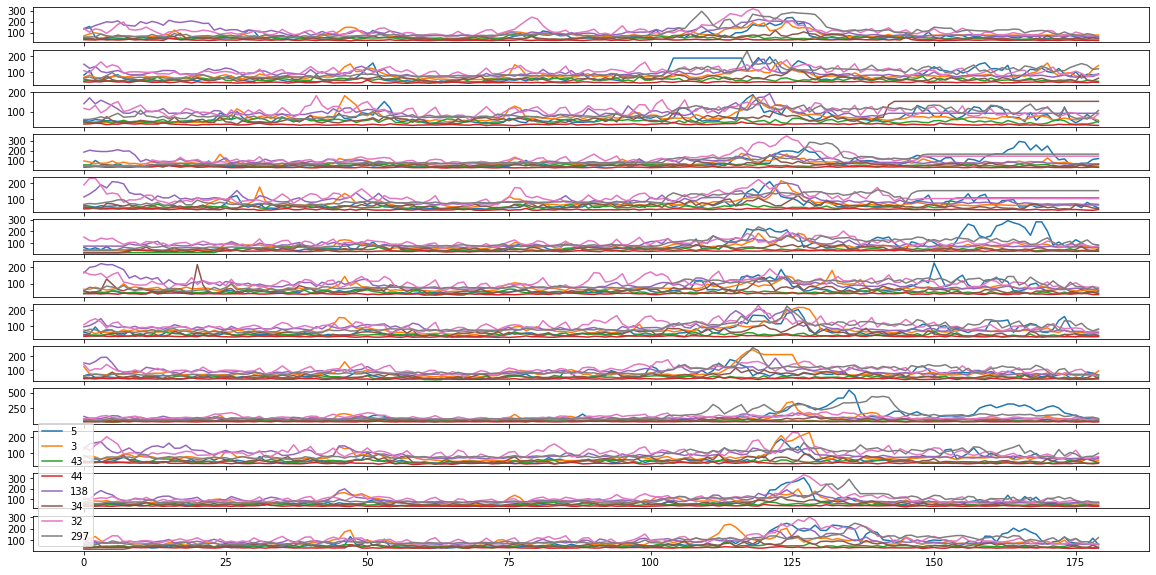

In [25]:
record=[]
seg_list=in_1.keys()
# fig=plt.figure()
for day in range(13):
    # sub_fig=fig.subplot
    day_record=[]
    for seg in seg_list:
        day_record.append(in_1[seg][day*180:(day+1)*180])
    # record.append(day_record)
    plt.subplot(13,1,day+1)
    plt.rcParams['figure.figsize']=(20,10)
    for seg in range(len(seg_list)):
        plt.plot([i for i in range(180)],day_record[seg],label=str(list(seg_list)[seg]))
plt.legend()
plt.show()

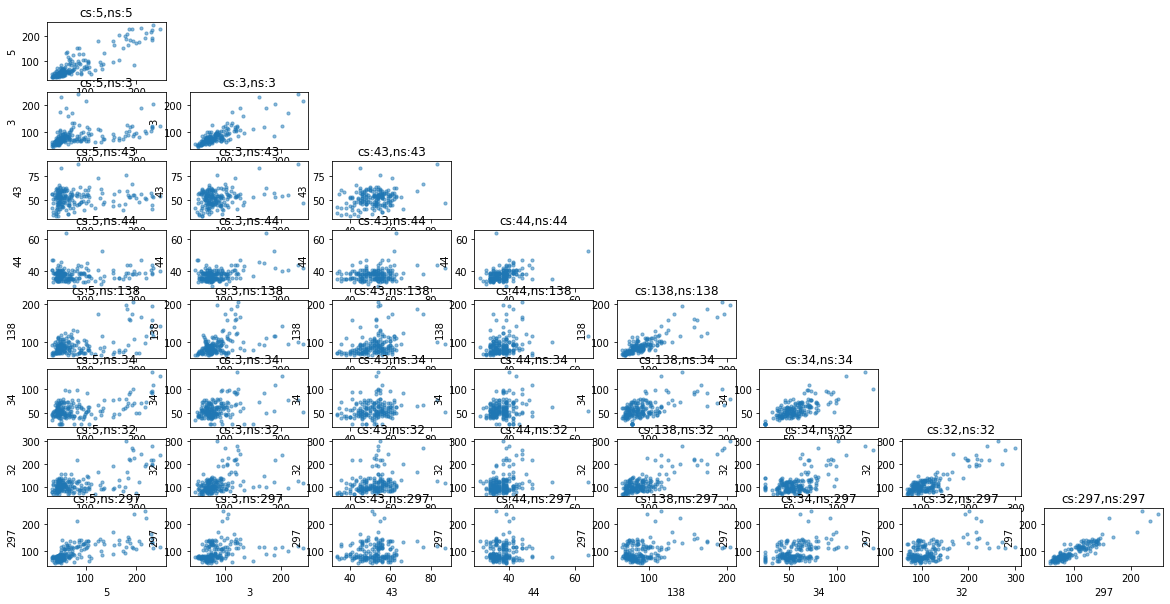

In [33]:
seg_list=list(seg_list)
seg_list_len=len(seg_list)
for seg_index in range(seg_list_len):
    for sub_index in range(seg_index+1):
        record_1=day_record[sub_index][:179]
        record_2=day_record[seg_index][1:180] #current time stamp
        plt.subplot(seg_list_len,seg_list_len,(seg_index*seg_list_len)+sub_index+1)
        plt.scatter(record_1,record_2,s=10,alpha=0.5)
        plt.title('cs:{},ns:{}'.format(seg_list[sub_index],seg_list[seg_index]))
        plt.xlabel('{}'.format(seg_list[sub_index]))
        plt.ylabel('{}'.format(seg_list[seg_index]))
    # plt.rcParams['figure.figsize']=(20,10)
plt.show()

In [39]:
numpy.array(day_record[3])

array([38., 40., 41., 42., 38., 38., 39., 39., 41., 40., 42., 38., 39.,
       40., 38., 40., 38., 37., 37., 38., 36., 44., 40., 41., 37., 36.,
       35., 35., 38., 36., 39., 40., 38., 39., 37., 38., 39., 38., 36.,
       37., 35., 39., 38., 35., 37., 38., 39., 35., 33., 35., 37., 34.,
       33., 35., 37., 34., 32., 38., 33., 34., 35., 33., 35., 37., 34.,
       36., 34., 35., 35., 35., 36., 35., 34., 32., 34., 32., 34., 36.,
       41., 36., 36., 35., 33., 33., 36., 38., 38., 38., 36., 34., 39.,
       38., 34., 38., 35., 37., 43., 40., 40., 40., 37., 39., 39., 42.,
       42., 38., 36., 42., 42., 40., 42., 37., 37., 35., 38., 38., 45.,
       42., 43., 42., 41., 40., 44., 46., 48., 43., 43., 39., 40., 38.,
       42., 42., 38., 40., 40., 39., 45., 39., 38., 45., 44., 43., 40.,
       38., 38., 36., 37., 38., 38., 35., 38., 40., 35., 42., 38., 36.,
       35., 38., 36., 35., 38., 41., 34., 36., 39., 38., 36., 37., 34.,
       36., 36., 36., 37., 36., 37., 37., 37., 36., 36., 38.])

In [36]:
for day in range(8):
    # sub_fig=fig.subplot
    day_record=[]
    for seg in seg_list:
        day_record.append(in_1[seg][day*180:(day+1)*180])

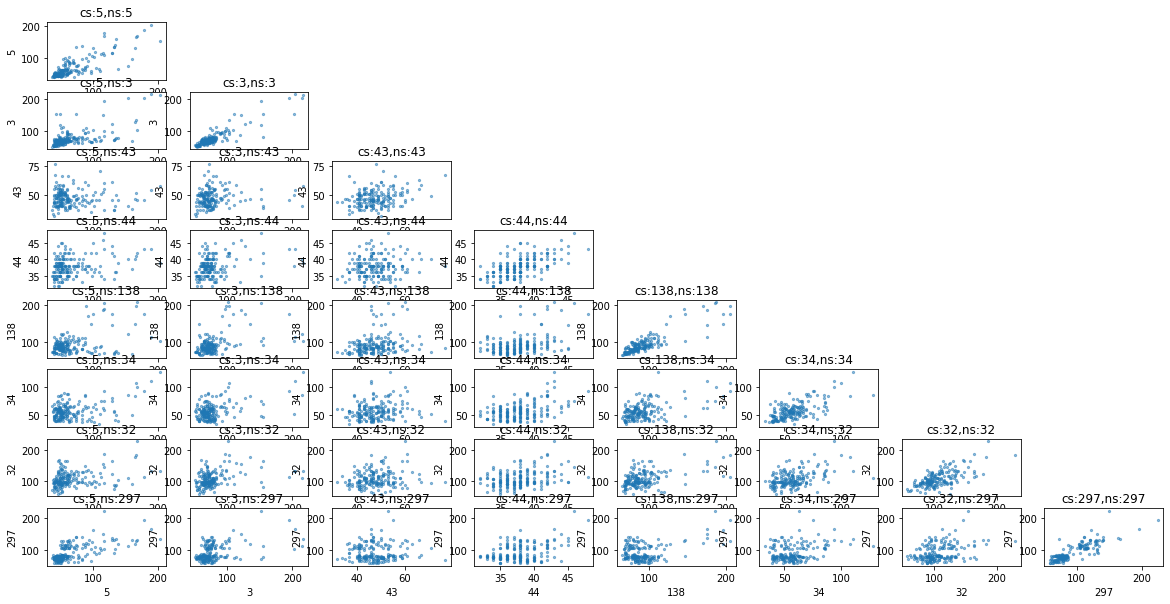

In [37]:
for seg_index in range(seg_list_len):
    for sub_index in range(seg_index+1):
        record_1=day_record[sub_index][:179]
        record_2=day_record[seg_index][1:180] #current time stamp
        plt.subplot(seg_list_len,seg_list_len,(seg_index*seg_list_len)+sub_index+1)
        plt.scatter(record_1,record_2,s=5,alpha=0.5)
        plt.title('cs:{},ns:{}'.format(seg_list[sub_index],seg_list[seg_index]))
        plt.xlabel('{}'.format(seg_list[sub_index]))
        plt.ylabel('{}'.format(seg_list[seg_index]))
    # plt.rcParams['figure.figsize']=(20,10)
plt.show()